In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('bodyfat.csv')
print(df.head())


   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [4]:
bodyfat_column = df['BodyFat']
print(bodyfat_column.head())
print(df.columns)


0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64
Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')


In [5]:
def calculate_correlation(col1, col2):
    """
    Calculate the Pearson correlation coefficient between two pandas Series.

    Parameters:
    col1 (pd.Series): First column.
    col2 (pd.Series): Second column.

    Returns:
    float: Correlation coefficient.
    """
    return col1.corr(col2)


In [6]:
cols = df.columns
coor_matrix = []

for i in cols:
  row = []
  for j in cols: 
    row.append(calculate_correlation(df[i], df[j]))
  coor_matrix.append(row)


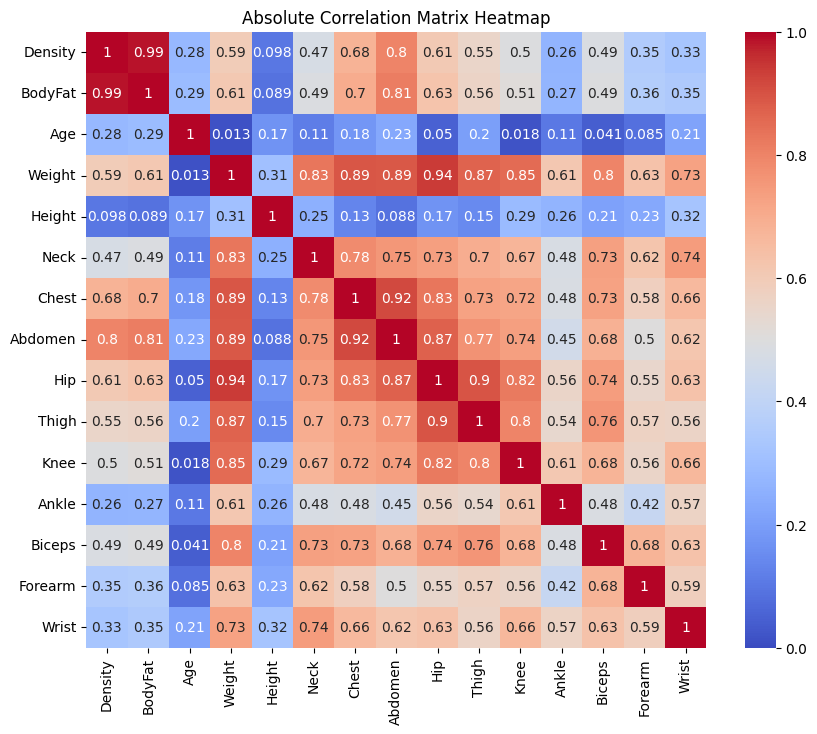

In [7]:
plt.figure(figsize=(10, 8))
abs_corr = np.abs(coor_matrix)
sns.heatmap(
    abs_corr,
    annot=True,
    cmap='coolwarm',
    xticklabels=df.columns,
    yticklabels=df.columns,
    vmin=0,
    vmax=1
)
plt.title('Absolute Correlation Matrix Heatmap')
plt.show()


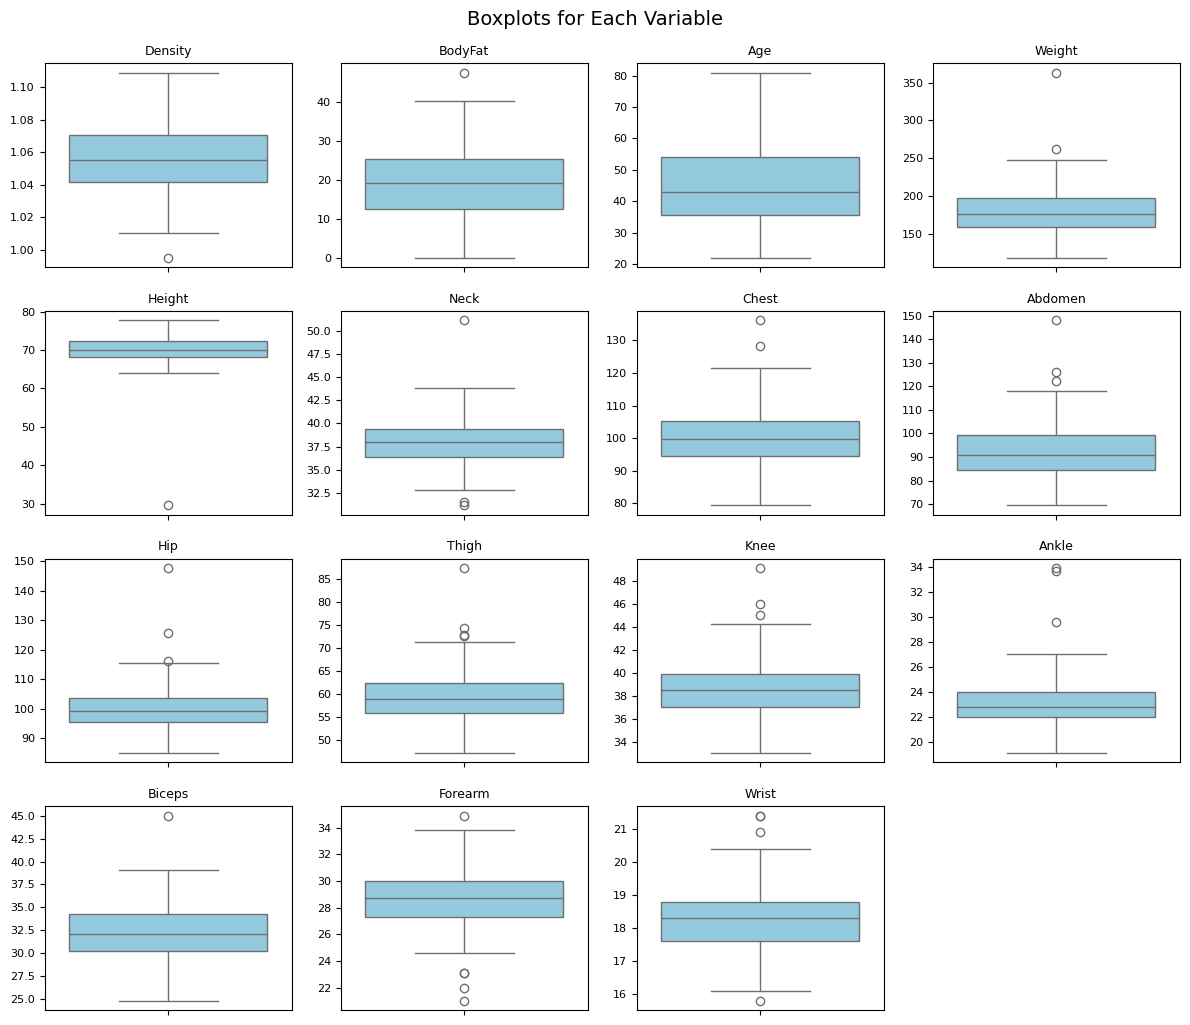

In [8]:
# Plot a grid of boxplots for each variable to visualize outliers

num_cols = len(df.columns)
n_cols = 4  # Number of plots per row
n_rows = int(np.ceil(num_cols / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*2.5))

for idx, col in enumerate(df.columns):
    row, col_idx = divmod(idx, n_cols)
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    sns.boxplot(y=df[col], ax=ax, color='skyblue', linewidth=1)
    ax.set_title(col, fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelsize=8)

# Turn off any unused subplots
for i in range(num_cols, n_rows * n_cols):
    row, col_idx = divmod(i, n_cols)
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    ax.axis('off')

plt.tight_layout(w_pad=1.0, h_pad=1.5)
plt.suptitle("Boxplots for Each Variable", fontsize=14, y=1.02)
plt.show()


In [9]:
def calculate_extremes(df):
    """
    Calculate the lower and upper extremes (fences) for outlier detection
    for each column in the dataframe using the IQR method.

    Lower extreme: Q1 - 1.5 * IQR
    Upper extreme: Q3 + 1.5 * IQR
    """
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_extreme = q1 - 1.5 * iqr
    upper_extreme = q3 + 1.5 * iqr
    return pd.DataFrame({'Lower Extreme': lower_extreme, 'Upper Extreme': upper_extreme})

# Example usage:
bounds = calculate_extremes(df)
print(bounds)


         Lower Extreme  Upper Extreme
Density         0.9979         1.1139
BodyFat        -6.7625        44.5375
Age             8.3750        81.3750
Weight        102.0000       254.0000
Height         62.2500        78.2500
Neck           31.8625        43.9625
Chest          77.8125       121.9125
Abdomen        62.4500       121.4500
Hip            83.4625       115.5625
Thigh          46.4750        71.8750
Knee           32.5500        44.3500
Ankle          19.0000        27.0000
Biceps         24.0125        40.5125
Forearm        23.2500        34.0500
Wrist          15.8000        20.6000


In [10]:
outlierRows = []

for idx, row in df.iterrows():
  for col in cols:
    if row[col] < bounds.loc[col, 'Lower Extreme'] or row[col] > bounds.loc[col, 'Upper Extreme']:
      # print(f"value: {row[col]}, bounds: {bounds.loc[col, 'Lower Extreme']} - {bounds.loc[col, 'Upper Extreme']}")
      # print(f"Outlier detected in {col} for row {idx}")
      outlierRows.append(idx)
      break

print(f"Dropping {len(outlierRows)} outliers")
print(f"Before: {df.shape}")
df = df.drop(index=set(outlierRows)).reset_index(drop=True)
print(f"After: {df.shape}")

Dropping 18 outliers
Before: (252, 15)
After: (234, 15)


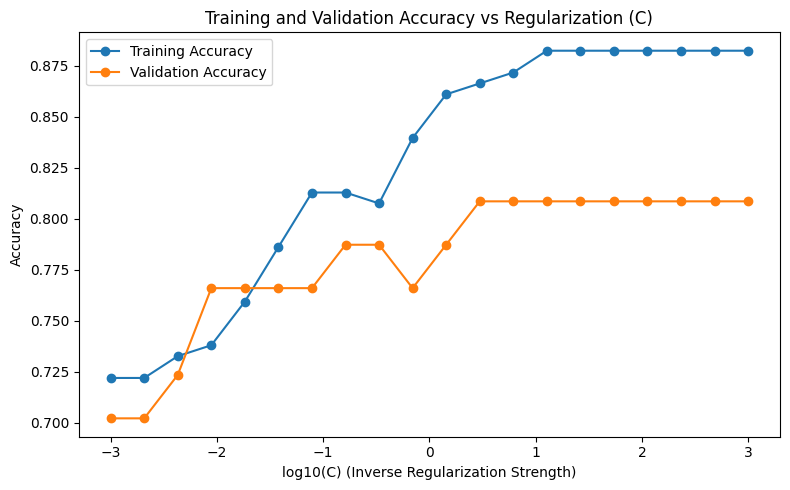

Best C: 2.976351441631316
Accuracy: 0.8085106382978723

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.89      0.71      0.79        24

    accuracy                           0.81        47
   macro avg       0.82      0.81      0.81        47
weighted avg       0.82      0.81      0.81        47



In [11]:
# Prepare X and y
X = df.drop(['BodyFat', 'Density', 'Age', 'Height', 'Ankle'], axis=1, errors='ignore')
y = df['BodyFat']

# For logistic regression, y should be categorical. We'll binarize bodyfat as 'above median' (1) or 'below-or-equal median' (0)
y_bin = (y > y.median()).astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_accuracies = []
val_accuracies = []
C_values = np.logspace(-3, 3, 20)  # range of regularization values (expanding gives more "epochs" effect)

for C in C_values:
    logreg = LogisticRegression(max_iter=1000, C=C, solver='lbfgs')
    logreg.fit(X_train_scaled, y_train)
    
    y_train_pred = logreg.predict(X_train_scaled)
    y_val_pred = logreg.predict(X_test_scaled)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    val_accuracies.append(accuracy_score(y_test, y_val_pred))

plt.figure(figsize=(8, 5))
plt.plot(np.log10(C_values), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(np.log10(C_values), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('log10(C) (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Regularization (C)')
plt.legend()
plt.tight_layout()
plt.show()

# Train final model at best C (highest val accuracy)
best_C = C_values[np.argmax(val_accuracies)]
logreg = LogisticRegression(max_iter=1000, C=best_C, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print(f"Best C: {best_C}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [12]:
from sklearn.mixture import GaussianMixture

def generate_synthetic_data(X, y):

  # Prepare your data (for regression)
  X_combined = np.hstack([X, y])

  # Fit GMM
  gmm = GaussianMixture(n_components=5, random_state=42)
  gmm.fit(X_combined)

  # Generate synthetic samples
  n_synthetic = 300  # How many samples you want
  synthetic_data = gmm.sample(n_synthetic)[0]

  # Split back into X and y
  X_synthetic = synthetic_data[:, :-1]
  y_synthetic = synthetic_data[:, -1]
  
  return X_synthetic, y_synthetic

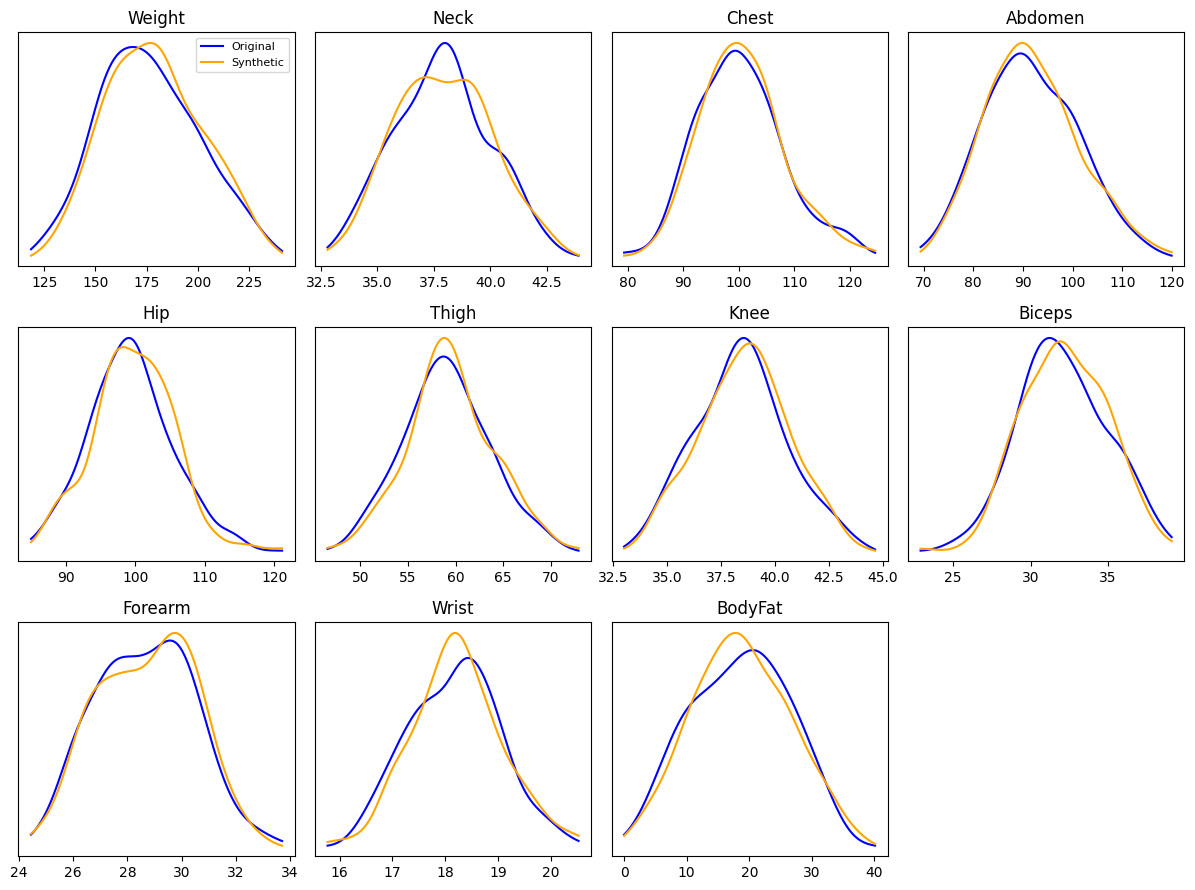

In [13]:
# Prepare X and y for regression (continuous output)
X = df.drop(['BodyFat', 'Density', 'Age', 'Height', 'Ankle'], axis=1, errors='ignore')
y = df['BodyFat']  # Continuous body fat percentage
y = y.values.reshape(-1, 1)

# Generate synthetic data
X_synthetic, y_synthetic = generate_synthetic_data(X, y)

import matplotlib.pyplot as plt

# Make sure y_synthetic and y are 1D for plotting (if necessary)
y_synthetic_flat = y_synthetic.flatten()
y_flat = y.flatten()

# Combine columns for easy plotting
all_columns = list(X.columns) + ['BodyFat']

# Create small subplots in a grid (4x4 for 16 features, adjust as needed)
n_cols = 4
n_rows = int(np.ceil(len(all_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*3))
axes = axes.flatten()

from scipy.stats import gaussian_kde

for idx, col in enumerate(all_columns):
    ax = axes[idx]
    # Original values
    if col != 'BodyFat':
        orig_vals = X[col].values
        synth_vals = X_synthetic[:, X.columns.get_loc(col)]
    else:
        orig_vals = y_flat
        synth_vals = y_synthetic_flat

    # Plot KDE for original data (blue)
    try:
        kde_orig = gaussian_kde(orig_vals)
        x_min = min(orig_vals.min(), synth_vals.min())
        x_max = max(orig_vals.max(), synth_vals.max())
        x_grid = np.linspace(x_min, x_max, 200)
        ax.plot(x_grid, kde_orig(x_grid), color='blue', label='Original')
    except Exception:
        pass

    # Plot KDE for synthetic data (orange)
    try:
        kde_synth = gaussian_kde(synth_vals)
        ax.plot(x_grid, kde_synth(x_grid), color='orange', label='Synthetic')
    except Exception:
        pass

    ax.set_title(col)
    ax.set_yticks([])
    if idx == 0:
        ax.legend(fontsize=8)

# Turn off unused axes
for ax in axes[len(all_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


Neural Network Architecture:


c:\Neil\CS 5805\project\archive\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 393.5446 - mae: 18.2760 - val_loss: 446.3729 - val_mae: 19.6405
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 372.0956 - mae: 17.7317 - val_loss: 409.0444 - val_mae: 18.7562
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 320.7425 - mae: 16.3368 - val_loss: 318.7105 - val_mae: 16.2892
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217.5631 - mae: 13.0734 - val_loss: 180.3722 - val_mae: 11.5312
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.6824 - mae: 9.1508 - val_loss: 166.3571 - val_mae: 10.7106
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102.8193 - mae: 8.1865 - val_loss: 147.5392 - val_mae: 10.0831
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.3945 - mae: 7.8916 - val_loss: 126.0839 - val_mae: 9.4985
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.1163 - mae: 7.1283 - val_loss: 123.3907 - val_mae: 9.0949
Epoch 9/100
15/15 ━━━━━

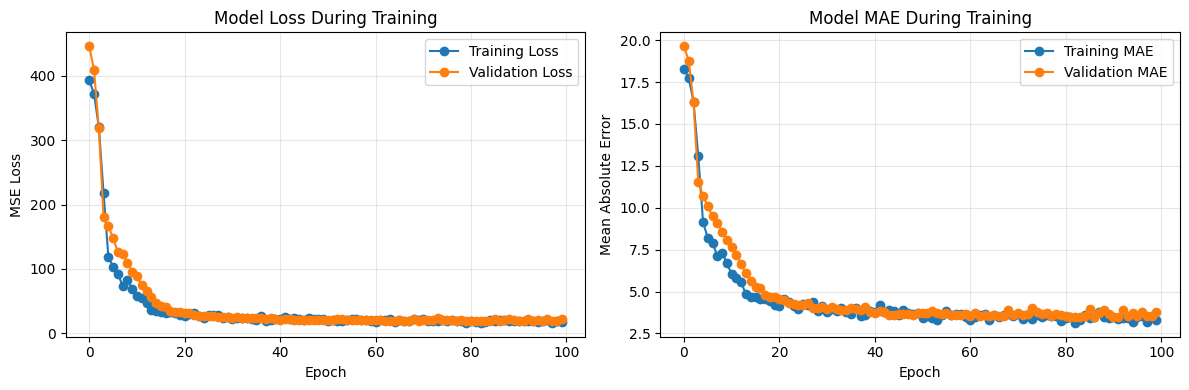

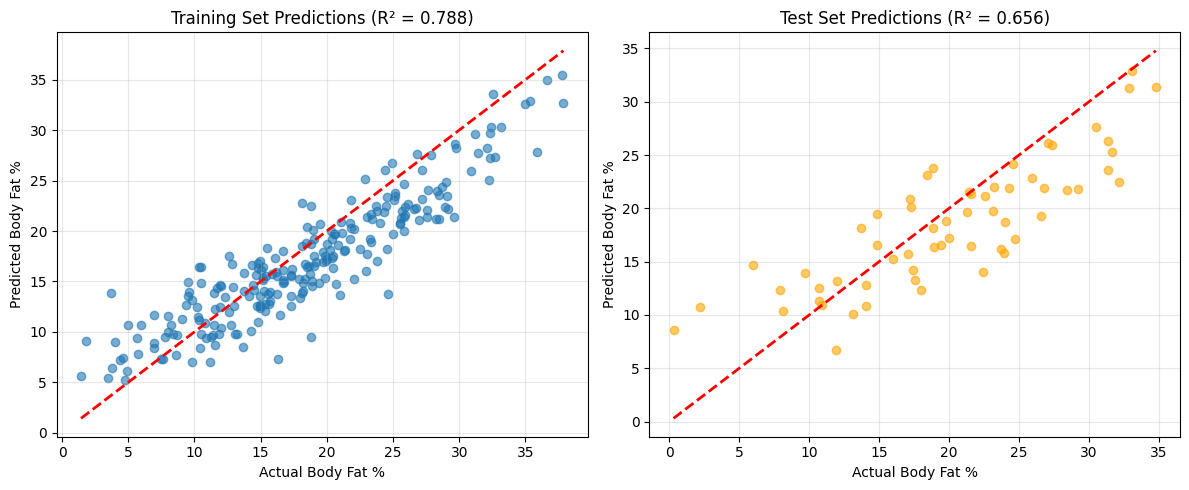

In [14]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# Normalize the data (using the same scaler approach)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train_scaled = y_train
Y_test_scaled = y_test

# Build neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Single output for continuous body fat percentage
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error as additional metric
)

# Display model architecture
print("Neural Network Architecture:")
model.summary()

# Train the model
history = model.fit(
    X_train_scaled, Y_train_scaled,
    validation_data=(X_test_scaled, Y_test_scaled),
    epochs=100,
    batch_size=16,
    verbose=1
)

# Make predictions
y_train_pred = model.predict(X_train_scaled, verbose=0).flatten()
y_test_pred = model.predict(X_test_scaled, verbose=0).flatten()

# Calculate metrics
train_mse = mean_squared_error(Y_train_scaled, y_train_pred)
test_mse = mean_squared_error(Y_test_scaled, y_test_pred)
train_mae = mean_absolute_error(Y_train_scaled, y_train_pred)
test_mae = mean_absolute_error(Y_test_scaled, y_test_pred)
train_r2 = r2_score(Y_train_scaled, y_train_pred)
test_r2 = r2_score(Y_test_scaled, y_test_pred)

print("\n" + "="*50)
print("Neural Network Performance Metrics")
print("="*50)
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', marker='o')
axes[0].plot(history.history['val_loss'], label='Validation Loss', marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].set_title('Model Loss During Training')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', marker='o')
axes[1].plot(history.history['val_mae'], label='Validation MAE', marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('Model MAE During Training')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set predictions
axes[0].scatter(Y_train_scaled, y_train_pred, alpha=0.6)
axes[0].plot([Y_train_scaled.min(), Y_train_scaled.max()], [Y_train_scaled.min(), Y_train_scaled.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Body Fat %')
axes[0].set_ylabel('Predicted Body Fat %')
axes[0].set_title(f'Training Set Predictions (R² = {train_r2:.3f})')
axes[0].grid(True, alpha=0.3)

# Test set predictions
axes[1].scatter(Y_test_scaled, y_test_pred, alpha=0.6, color='orange')
axes[1].plot([Y_test_scaled.min(), Y_test_scaled.max()], [Y_test_scaled.min(), Y_test_scaled.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Body Fat %')
axes[1].set_ylabel('Predicted Body Fat %')
axes[1].set_title(f'Test Set Predictions (R² = {test_r2:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:
# Loop through the dataset to get predictions
all_X = np.vstack([X_train_scaled, X_test_scaled])
all_y = np.concatenate([y_train, y_test])

# Get above/below median predictions from logistic regression
above_below_preds = logreg.predict(all_X)

# Get neural net bodyfat predictions (assume needs inverse_transform to get actual percent)
nn_preds = model.predict(all_X, verbose=0).flatten()

median_bf = np.median(all_y)

num_samples = all_y.size
num_correct = 0
for idx, (logreg_pred, y_true, nn_pred) in enumerate(zip(above_below_preds, all_y, nn_preds)):
    label = "Above" if logreg_pred == 1 else "Below"
    true_cat = "Above" if nn_pred >= median_bf else "Below"
    # print(f"{idx:4d} | {label:12} | {y_true:8.2f} | {nn_pred:9.2f} | {true_cat:16}")
    if label == true_cat:
      num_correct += 1
      
print(f"Combined model accuracy (times where both models agree): {num_correct / num_samples:.2f}")

Combined model accuracy (times where both models agree): 0.90
